# Sample Size - How much data is enough for your experiment?

<div class="alert alert-block alert-danger">
<b>Alert:</b> If you're running this on <b>Google Colab</b>, then uncomment and run the next two cells.
</div>

In [ ]:
# !git clone https://github.com/Mark-Kramer/METER-Units.git

In [ ]:
# import sys
# sys.path.insert(0,'/content/METER-Units')

## 1 - Just Google it?

In [2]:
# Load modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
# Load custom functions
from sample_size_functions import *

<div class="alert alert-block alert-info">

*Introduction*:

- Your lab is studying a potential new *genetic biomarker for longevity*, substance $x$. 
- Our goal is to design and perform an experiment to test the predictive power of this novel biomarker. To do so, we need to compute the **sample size** for our experiment, the number of subjects from whom to collect data, to determine whether the biomarker is useful.
- **That's the goal of this unit:** perform a sample size calculation.
- To start, we'll provide limited information about substance $x$ and longevity, and ask you to determine the sample size.
- **No idea how to start a sample size calculation?** Don't worry! The goal of this unit is to teach you a general approach.
- By the end of this unit, you'll have a deeper understanding of what sample size means, and a general, practical approach to compute it.
</div>

Based on the groundbreaking research previously conducted in your lab, you and your collaborators have formulated a compelling scientific hypothesis: substance $x$ could be a genetic biomarker for longevity, potentially influencing the age at which individuals pass away. This intriguing hypothesis opens up a new frontier in our understanding of genetics and lifespan, promising significant advancements in the field.

Before we can embark on an experimental journey to test the predictive power of this novel biomarker, we must first tackle a critical step: determining the appropriate sample size for a follow-up research study. The sample size is not just a number; it is a cornerstone of experimental design that ensures our data will be robust enough to support or refute our hypothesis.

To accurately compute this sample size, we need to consider our prior beliefs and existing knowledge about substance $x$ and its relationship to longevity. Let's delve into the specifics. Imagine we have the following limited yet crucial pieces of information:

1. **Distribution of Substance $x$:** The expression levels of substance $x$ in people follow a normal distribution.


2. **Impact on Longevity:** Individuals at the high end of the expression spectrum tend to live approximately 5 years longer than those at the low end.

Given these insights, our task is to calculate a sample size that can yield statistically significant results. This endeavor will not only help us test our hypothesis with precision but also pave the way for future research that could revolutionize our understanding of genetic influences on lifespan. Let's proceed with this vital calculation, knowing that the outcomes will bring us one step closer to potentially groundbreaking discoveries in genetic biomarkers and longevity.

<div class="alert alert-block alert-success">

**Q:** Given this information, how many individuals should we include in our study to have a reasonable chance of demonstrating this hypothesis is correct? (I.e., What is the **sample size**?)
</div>

<div class="alert alert-block alert-danger">
<b>ALERT: Wait, I have no idea how to answer this?</b>

</p>

- Don't worry!
- The goal of this unit is to teach you to tackle this problem.
- Let’s first come up with **any approach** to compute a sample size, even if we’re not confident in the results.

A few possible places to start:

- *Take an educated guess*: Perhaps you have taken part in or [read about](https://journals.sagepub.com/doi/pdf/10.4103/0253-7176.116232) similar research before. What order of magnitude seems right for this sort of experiment?

- *Find a source*: Sample size estimation is a common topic in introductory statistics textbooks. These often include formulas that students can use to compute sample size for specific categories of questions.
- *Google it*: : There are many web-based resources (including online calculators) that are designed to enable sample size calculations. Search engines provide a starting point for finding such resource Doing so, you might end up at a website [like this](https://researchmethodsresources.nih.gov/grt-calculator) or [like this](https://www.abs.gov.au/websitedbs/d3310114.nsf/home/sample+size+calculator).
</div>

<div class="alert alert-block alert-success">
    
**Q:** Now, try to estimate the sample size using one of these approaches. What obstacles did you encounter along the way?(NOTE: This isn’t always easy or obvious, even for veteran researchers!!)

**A:** 
- Videos of established researchers and/or students trying to answer this question. Videos will emphasize the difficulty / confusion almost every researcher encounters.
- Here's a [good video of the challenge](https://www.youtube.com/watch?v=Hz1fyhVOjr4).

</div>

<div class="alert alert-block alert-success">

**Q:** Given the description of the scientific hypothesis and experiment, think about what data you would collect and what analyses you would perform to test the hypothesis.

- What types of values do you expect for each variable? What are their distributions, do you think?- How do you expect the variables to be related?- Try drawing a sketch of what you imagine a successful result might look like?

**A:**
- (Text) For each participant, we will collect expression levels of substance $x$ and age at death.
- (Text) I expect age at death to increase with $x$.
- (Multiple Choice) Show different plots of $x$ versus age at death, and ask learner to select the plot most consistent with the hypothesis.
</div>

<div class="alert alert-block alert-success">

**Q:** We provided very little information and asked you to compute the sample size. What other information do you think would be helpful to estimate the sample size?

**A:**

</div>

## 2- Underpowered experiments are doomed to failure.

Now that you've determined (or guessed) the sample size `N` for your experiment, let's perform the experiment.

You collect `N` samples of data, so that you receive from each individual:

* `x` - a measure of the proposed biomarker for longevity,

* `lifespan` - the individual's age at death.


In [5]:
N = 100                               # Here, learner will input N they found in Mini 1.
x,lifespan = load_data(N)             # Use this by default.
# x,lifespan = load_data_Colab(N)     # Use this if on !!GOOGLE COLAB!!

Let's start by plotting the data.

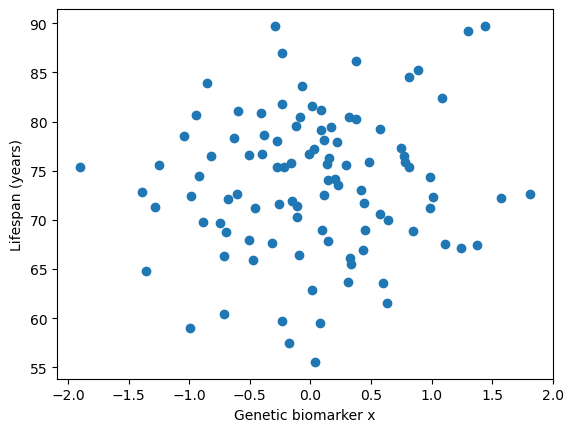

In [6]:
plt.scatter(x,lifespan)
plt.xlabel('Genetic biomarker x')
plt.ylabel('Lifespan (years)');

<div class="alert alert-block alert-success">

**Q:** What do you observe? Does the hypothesized relationship between the biomarker $x$ and lifespan appear present in the data?

**A:**
- The data look like a random cloud of points.
- It's very difficult to see the hypothesized relationship between $x$ and lifespan.

</div>

Let's assess the relationship between the biomarker `x` and `lifespan` beyond visual inspection.

There are many ways to do so.

Here, we'll fit a line to the data and compute the slope.

In [35]:
# Estimate a line from the data.
from statsmodels.formula.api import ols
dat                = {"x": x, "lifespan": lifespan}
regression_results = ols("lifespan ~ 1 + x", data=dat).fit()

<div class="alert alert-block alert-success">

**Q:** If this code is new to you, don't worry. Can you see the equation for the line in the code above?

**A:**

- The general equation for a line is `y = b + mx` where `b` is the intercept and `m` is the slope.
- Here, we're interested in the specific line `lifespan = b + mx`.
- In the code above, we represent this equation with the notation `lifespan ~ 1 + x`. In this notation, we tell Python to estimate the outcome variable `lifespan` as a function of a constant (with label `1` in the code) and predictor `x`. Python then estimates the solution to `linespan = b + mx` by finding the best values for `b` (the intercept) and `m` (the slope).
- In the code above, we estimate the slope `m`, which characterizes the relationship between `lifespan` and `x`.
</div>

Now, with the line estimated, we can print the estimated slope,  and its p-value.

In [36]:
print('Slope estimate                   = {:.3f}'.format(regression_results.params[1]))
print('Standard error of slope estimate = {:.3f}'.format(regression_results.bse['x']))
print('p-value                          = {:.3f}'.format(regression_results.pvalues[1]))

Slope estimate                   = 0.915
Standard error of slope estimate = 1.018
p-value                          = 0.371


Let's interpret these numbers:

#### Slope estimate = 0.915

**Meaning:** The slope estimate represents the change in the `lifespan` for a one-unit change in the the genetic biomarker `x`.

**Interpretation:** For every one-unit increase the genetic biomarker `x`, the lifespan is estimated to increase by 0.915 years, on average.

#### Standard error of slope estimate = 1.018

**Meaning:** The standard error measures the average amount that the slope estimate varies from the true slope of the population regression line. It indicates the precision of the slope estimate.

**Interpretation:** A standard error of 1.018 suggests that the slope estimate (0.915) could vary by about 1.018 units from the true slope. Given that the standard error is relatively large compared to the slope estimate, this implies that there is a considerable amount of uncertainty in the estimate.

#### p-value = 0.371

**Meaning:** The p-value is used to test the null hypothesis that the slope of the regression line is zero (no relationship between `x` and `lifespan`).

**Interpretation:** A p-value of 0.371 is much larger than common significance levels (e.g., 0.05). This means that there is not enough evidence to reject the null hypothesis. In other words, the data do not provide sufficient evidence to conclude that there is a statistically significant relationship between `x` and `lifespan`.

Let's also **visualize** the estimated line by plotting it with the data.

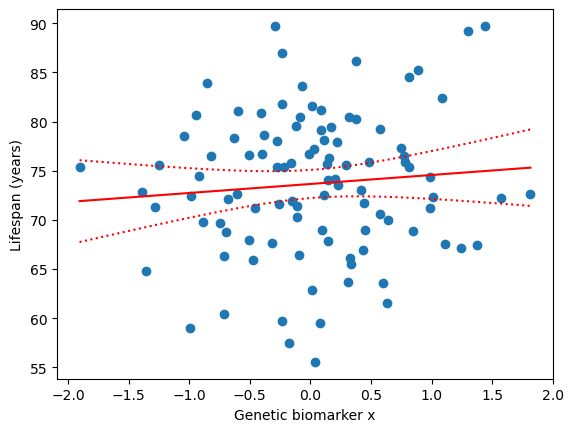

In [37]:
pred   = regression_results.get_prediction().summary_frame()
mn     = pred['mean']
ci_low = pred['mean_ci_lower'] 
ci_upp = pred['mean_ci_upper']

# And plot it.
indices_sorted = np.argsort(x,0)
plt.scatter(x,lifespan)
plt.plot(x[indices_sorted[:,0]],mn[indices_sorted[:,0]], 'r')
plt.plot(x[indices_sorted[:,0]],ci_low[indices_sorted[:,0]], ':r')
plt.plot(x[indices_sorted[:,0]],ci_upp[indices_sorted[:,0]], ':r')
plt.xlabel('Genetic biomarker x')
plt.ylabel('Lifespan (years)');

<div class="alert alert-block alert-success">

**Q:** Do you find a significant relationship between the genetic biomarker `x` and `lifespan`?

**A:**

- No. The results suggest that while there is a positive slope, indicating a potential relationship between the genetic biomarker `x` and `lifespan`, the high standard error and non-significant p-value imply that this relationship is not statistically significant. Further investigation with more data or additional variables may be needed to draw more definitive conclusions.
</div>

<div class="alert alert-block alert-danger">
<b>Alert: Wait, this doesn't make sense!</b>

</p>

- We've applied a standard approach to compute sample size `N` and performed the experiment using this sample size.

- We see a trend supporting the hypothesized relationship, but it's not significant.

- Has the experiment failed?

- What's going on?
</div>

## 3- With resampling you can compute the sample size!


The data provided in Mini 2 represent one instantiation of the experiment, conducted with a sample size `N`. While our analysis of these data did not yield evidence to support our hypothesis, they remain extremeley useful for our continued investigation into sample size. Specifically, we can leverage these data to estimate the necessary sample size for a subsequent experiment. By implementing a resampling procedure, we will systematically examine how variations in sample size `N` influence our capacity to detect a significant result, thus optimizing our experimental design for future investigations.

#### Resampling procedure (Introduction)
We're going to attempt something that seems far-fetched and magical: we'll generate new data from our existing data. To do so, we'll implement a nonparametric bootstrap to generate new pseudodata from the observed data. 

*A note on the nonparametric bootstrap.* Briefly, there is strong theoretical justification for the nonparametric bootstrap. The fundamental idea is that resampling the data with replacement is equivalent to sampling new pseudodata from the empirical cumulative distribution function (eCDF) of the observed data. For a large sample of independent, identically distributed random variables, the distribution of the pseudodata generated from the eCDF will be close to the true distribution of the data. Note the important caveat that the variables are independent, identically distributed; this assumption fails in many cases, such as for time series. Here, we assume that the genetic biomarker and lifespan from each subject are drawn independently from the same distribution (i.e., the values from a subject are independent, identically distributed variables).

#### Resampling procedure (4 steps)

Our resampling procedure consists of 4 steps:

1) Choose a new sample size (call it `N_resampled`).
2) Draw a new (random) set of `N_resampled` labels we can use to index our data (biomarker $x$ and lifespan).
3) Use these indices to create new pseudodata: a resampled data set.
4) Compute the relationship (and its statistical significance) between the biomarker $x$ and lifespan in our resampled data.

We'll now describe each step. For a related example, [see this video](https://youtu.be/mqDEJyW_z4c?si=heigY8z5PqAjnwKZ).

#### Resampling procedure: Step 1
Our first step is to choose a new sample size. Let's call it `N_resampled`.

<div class="alert alert-block alert-success">

**Q:** What will you choose for `N_resampled`?

**A:**
- Our original choice of sample size resulted in a positive slope estimate, indicating a potential relationship between the genetic biomarker `x` and `lifespan`. But, the high standard error and non-significant p-value imply that this relationship is not statistically significant. Further investigation with more data may draw more definitive conclusions. So let's increase the sample size ...

</div>

In [8]:
N_resampled = 500;

#### Resampling procedure: Step 2
Our second step is to draw a random set of `N_resampled` labels to index our data (biomarker `x` and `lifespan`).

To visualize this procedure, imagine we assign each patient in the original data set a number, from $0$ up to `N`. We then write each number on a marble and place all `N` marbles in an opaque bag. Each marble is assigned a unique integer value from 0 to `N`-1. Now, reach your hand into the bag, grab a marble, record its number, and replace the marble in the bag. We assume that each marble is equally likely to be selected at each draw (i.e., there are no special features that allow some marbles to be drawn more often). Repeat this procedure `N_resampled` times to create a list of `N_resampled` integers. Notice that after recording the drawn marble’s number, we replace it in the bag. So, we could potentially draw the same marble `N_resampled` times, although that’s extremely unlikely.

Performing this sampling with replacement procedure by hand would, of course, be extremely time consuming (e.g., who will paint integers on each marble?). Fortunately, this is the type of boring task where a computer excels.

Let's have a look at this "marble draw":

In [11]:
ind = np.random.choice(np.size(x), N_resampled)
print(ind)

[99 23  6 76 25 99 64 49 79 46 27 45 10 86 88 58 71 85 47 86 36 31 31 29
 88 96 40 97 83 93  7 76 80 77 95 66 62 75 86 62 96 63 62 76 83  2  7 93
 89 32 56 10 83 44 20 12 84 66 43 55 48 77 24 67 40 71 61 44 13 25  8 62
 26 87 79 50 19 84 56 10 94 98 31  7  7 97 87 24 21 81 88 68 14 53 78 60
 11 81 56 14 83 23  7 83 85 73 67 16 86  6 57 15 10 75 14 60 61 67  5 98
 19 88 58 46 85 80 67 49 37  4 36 78 28 25 98 50 88 90  8 62 74 80 23 66
 51 60 12 17 96 81  9 78 29 65 10 90  7 71 29  0 90 91 65 34 78 14  9 31
 48 62 35 91  2 22 10 15 86 65  8 20 33 93 62 11 76 88 80 63 20 83 49 70
  3 39 78 79 96 83 80 38 36 65 54 45 95 90 68 46 98 46 56 63 71 24 39 55
 45 78 22 95 75 49  5 94 26 11 40 42  8 94 57 74 78 96 45 54 91  8 30 91
 18 10 48 89 54 99 76 84 90 66 35 26 84 77 37 44  5 59  3 19 71 76 13 73
 46 65 53 38 51 81  0 75 67 37 63 65 70 19 58 62 35 77 50 37 38 25 66 32
 96 43 76 20 91 46 94 63 61 37 33 94 84 40 59 61 29 91 47 62 83 66 36 31
 99 17 16 51 42 61 72 98 44 99 46 52  0 81  4  6 51

<div class="alert alert-block alert-success">

**Q:** Look at the values in `ind`. What do they mean?

**A:**
- There are `N_resampled` values in the vector `ind`. That's because we draw `N_resampled` marbles.
- These are the indices to our original data set. You can think of these as numbers indicating particiaptins in the study (e.g., Participant 1, Participant 10, Participating 102, ...)
</div>

<div class="alert alert-block alert-success">

**Q:** Run the code to generate `ind` again. What do you find? (I.e., is it the same or different than the first time?)

**A:**

- Because we draw random sets of indices, the values in `ind` will differ each time we run the code.

</div>

#### Resampling procedure: Step 3

Our third step is to use these indices to generate the resampled data. To do so, we'll draw data from the study participants using the indices in `ind`. Again, this is a task for a computer:  

In [12]:
x_resampled        = x[ind]
lifespan_resampled = lifespan[ind]

<div class="alert alert-block alert-success">

**Q:** How many values are in the resampled data `x_sampled` and `lifespan_resampled`?

**A:**
- There are `N_resampled` values in resampled data. That's because we're usig the vector `ind` to resample the data, and we drew `N_resampled` marbles.
</div>

Let's see what those values look like, compared to our original data set.

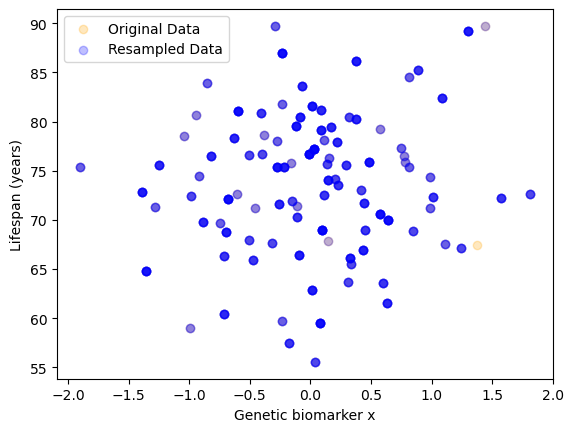

In [29]:
plt.scatter(x, lifespan, color='orange', alpha=0.25, label='Original Data')
plt.scatter(x_resampled, lifespan_resampled, color='blue', alpha=0.25, label='Resampled Data')
plt.xlabel('Genetic biomarker x')
plt.ylabel('Lifespan (years)');
plt.legend();

<div class="alert alert-block alert-success">

**Q:** Compare the plots of the original data (`x` and `lifespan`) with the pseudodata (`x_resampled` and `lifespan_resampled`). What do you observe? Do the pseudodata "look like" the original data?

**A:**

- There are more pseudodata (i.e., there are more dark blue dots compared to dark orange dots). That's because `N_resampled` is bigger than the original sample size.
- The pseudodata overlaps the original data. That makes sense because we draw the pseudodata from the original data.
</div>

#### Resampling procedure: Step 4

Our fourth step is to compute the relationship (and its statistical significance) between the resampled biomarker $x$ and resampled lifespan.

To do so, we'll follow the same approach as above. We'll fit the same line to new resampled data, and again compute the slope and significance.

In [34]:
# Estimate a line from the resampled data.
from statsmodels.formula.api import ols
dat_resampled                = {"x": x_resampled, "lifespan": lifespan_resampled}
regression_results_resampled = ols("lifespan ~ 1 + x", data=dat_resampled).fit()

print('Slope estimate (resampled data)                   = {:.3f}'.format(regression_results_resampled.params[1]))
print('Standard error of slope estimate (resampled data) = {:.3f}'.format(regression_results_resampled.bse['x']))
print('p-value (resampled data)                          = {:.3f}'.format(regression_results_resampled.pvalues[1]))

Slope estimate (resampled data)                   = 1.068
Standard error of slope estimate (resampled data) = 0.490
p-value (resampled data)                          = 0.030


<div class="alert alert-block alert-success">

**Q:** Are the slope estimate in the original data and resampled data similar or different? What about the standard errors in the estimates?

**A:**
- The slope estimates are similar (near 1).
- The standard error estiamtes are different. The standard error is smaller in the resampled data.

</div>

<div class="alert alert-block alert-success">

**Q:** Repeat Resampling Steps 2,3,4 to generate results from multiple "experiments". Do you ever find a significant result? How often do the p-values you find reach your desired level of statistical significance?

**A:**
- Yes, now we sometimes find p<0.05 in the resampled data.
</div>

### Now, let's use this resampling approach to determine a good sample size for our experiment.

To do so, we'll first introduce the concept of **statistical power**.

In the context of statistical analysis, power and sample size are closely interrelated concepts.

**Statistical Power** is the probability that a test will correctly reject a false null hypothesis (i.e., detect an effect if there is one). Higher power reduces the risk of a Type II error, where a real effect is missed (failing to reject a false null hypothesis).

Our initial challenge was to compute the **sample size**: the number of observations or data points included in a study. Our initial choice `N` was too small; with this choice, we did not detect a significant relationship between the biomarker `x` and lifespan, i.e., we did not have enough **statistical power**.

Using resampling, we generated pseudodata with an increased sample size `N_resampled`. Doing so, we found (sometimes) a significant relationship between the biomarker `x` and lifespan; we (sometimes) found p<0.05, the magical threshold to declare a significant effect. If you'd like to understand this magic, check out [LINKS TO OTHER METERS]. 

We can use this same resampling procedure to compute the statistical power of our test given the sample size. We'll do so in a few steps:

#### Resampling procedure to estimate the statiscal power (4 steps)

1) Choose a new sample size (call it `N_resampled`).
2) Draw a new (random) set of `N_resampled` labels we can use to index our data (biomarker $x$ and lifespan).
3) Use these indices to create new pseudodata: a resampled data set.
4) Compute  statistical significance (p-value) between the biomarker $x$ and lifespan in our resampled data.
5) Repeat Steps 1-5 `K` times, saving the p-value each time.
6) The **statistical power** is the proportion of p-values below a chosen threshold `alpha`.

That's a lot of steps! Let's break them down:

#### Resampling procedure: Steps 1-4

However, you've already done steps 1-4 when performing resampling to create pseudodata. Nothing new to see here.

#### Resampling procedure: Step 5

We've added Step 5, in which we create `K` new instances of the pseudodata. For each instance, we calculate and save the p-value corresponding to the statistical significnace of the relationship between the biomarker $x$ and lifespan in our resampled data.

At the end of Step 5, we'll have created a vector of `K` p-values. Let's do so now:

In [60]:
K = 1000
p_values = np.zeros(K)
for k in np.arange(K):                                 # For each k,
    ind = np.random.choice(np.size(x), N_resampled)    # ... get N_resampled indices,
    x_resampled = x[ind]                               # ... to create the pseudodata.
    lifespan_resampled = lifespan[ind]                 # Estimate the line,
    dat                = {"x": x_resampled, "lifespan": lifespan_resampled}
    regression_results = ols("lifespan ~ 1 + x", data=dat).fit()
    p_values[k] = regression_results.pvalues[1]         # ... and save the p-value of the slope.

Let's investigate this list of p-values by plotting a historgram:

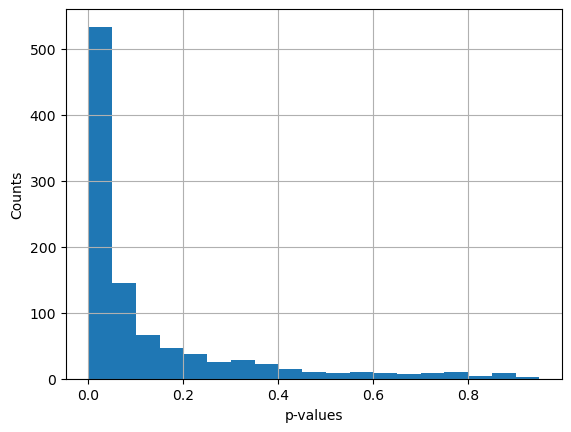

In [61]:
plt.hist(p_values, bins=np.arange(0,1,0.05));
plt.xlabel('p-values')
plt.ylabel('Counts')
plt.grid()

<div class="alert alert-block alert-success">

**Q:** What p-values do you observe?

**A:**
- P-values extend from near 0 to near 1.
- P-values are more concentrated near 0.

</div>

#### Resampling procedure: Step 6
Our last step to compute the statistical power is the proportion of p-values below a chosen threshold `alpha`.

The theshold `alpha` represents the threshold for rejecting the null hypothesis when it is actually true. It's conventional to set

`alpha = 0.05`

which means that there is a 5% chance of committing a Type I error, which is the error of incorrectly rejecting a true null hypothesis. This  value is not inherently magical or optimal in all circumstances. But, it has become a convention primarily because it offers a middle ground that has been deemed acceptable by the scientific community for controlling Type I errors.

To implement Step 6, let's compute the `statistical_power` as the proportion of times that `p_values` is less than the threshold `alpha`.

In [63]:
alpha = 0.05;
statistical_power = np.sum(p_values < 0.05)/K
print(statistical_power)

0.533


<div class="alert alert-block alert-success">

**Q:** Interpret the value in `statistical_power`. What does it mean?

**A:**
- This value represents the proportion of times we drew pseudodata and detected a significnat relationship between the biomarker `x` and lifespan. 

</div>

The value in `statistical_power` is the **statistical power** of our test. It represents the proportion of times we reject the null hypothesis and declare a signifcant relationship between the biomarker `x` and lifespan.

To make this graphically explicit, let's replot the histogram of `p-values` with a line at our threshold `alpha`.

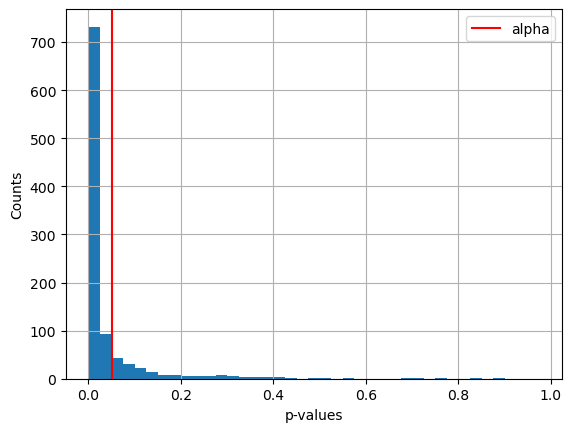

In [79]:
plt.hist(p_values, bins=np.arange(0,1,0.025));
plt.xlabel('p-values')
plt.ylabel('Counts')
plt.grid()
plt.axvline(x=0.05, color='red', label='alpha')
plt.legend();

In this plot, the **statistical power** is the proportion of values to the left (i.e., smaller than) the red line.

And that's it!

The **statistical power** is not a mystical quantity. It's the probability that a test will correctly reject a false null hypothesis. And, using the data we collected, we can compute this **statistical power** for different choices of sample size (`N_resample`).


Let's collect all the code, and perform one more experiment:

In [81]:
N_resampled = 500
alpha       = 0.05
K           = 1000
p_values = np.zeros(K)
for k in np.arange(K):                                 # For each k,
    ind = np.random.choice(np.size(x), N_resampled)    # ... get N_resampled indices,
    x_resampled = x[ind]                               # ... to create the pseudodata.
    lifespan_resampled = lifespan[ind]                 # Estimate the line,
    dat                = {"x": x_resampled, "lifespan": lifespan_resampled}
    regression_results = ols("lifespan ~ 1 + x", data=dat).fit()
    p_values[k] = regression_results.pvalues[1]         # ... and save the p-value of the slope.
statistical_power = np.sum(p_values < 0.05)/K
print('Statistical power = {:.3f}'.format(statistical_power), 'for N_resampled={:.0f}'.format(N_resampled), 'and alpha={:.2f}'.format(alpha))

Statistical power = 0.537 for N_resampled=500 and alpha=0.05


<div class="alert alert-block alert-success">

**Q:** Increase `N_resampled` in the code above. What happens to the statistical power?

**A:**
- Statistical power increases with `N_resampled`.
- Larger samples provide more information about the population, leading to more precise estimates of the population parameters. This precision reduces the standard error and widens the gap between the null hypothesis and the alternative hypothesis if there is a true effect, making it easier to detect significant differences. Therefore, increasing the sample size typically increases the power of a statistical test.

</div>

<div class="alert alert-block alert-success">

**Q:** At what value of `N_resampled` does the statistical power equal 0.80?

**A:**
- At approximately `N_resampled` = 1000, the statistical power equals 0.80.
</div>

<div class="alert alert-block alert-success">

**Q:** Why do we choose statistical power 0.8?

**A:**
Choosing a statistical power of 0.8, or 80%, is a common convention in many fields of research, particularly in the social and biomedical sciences. 

Statistical power is the probability of correctly rejecting a false null hypothesis, thus avoiding a Type II error. A power of 0.8 means there is a 20% chance of a Type II error (failing to detect a true effect). Setting the power at 0.8 provides a reasonable balance between the risks of Type I errors (false positives) and Type II errors (false negatives). Researchers often choose a 5% (`alpha=0.05`) significance level for Type I errors, aiming to maintain a pragmatic yet cautious approach to declaring findings.

Increasing power beyond 0.8 generally requires larger sample sizes, which can escalate the costs and logistical complexity of a study. The choice of 0.8 is considered a good trade-off between increasing precision and controlling operational constraints.

The 0.8 level has become somewhat of a standard through historical precedent and its endorsement in statistical texts and guidelines. Researchers often follow these conventions to align with accepted practices, making their studies comparable to others in the field.

*Summary*:

We've done something remarkable.

We began with `N` obsevations in our original data set. Analyzing these data, we failed to detect a significant relationship between the biomarker $x$ and lifespan.

Rather than abandoning these data, we instead repurposed these data to perform a sample size calculation.

We used the original data to perform a resampling procedure to create pseudodata with different sample sizes `N_resample`. 

We repeated this procedure to compute the **statistical power**: the proportion of times we reject the null hypothesis.

We hope this provides a more direct, intutive approach to computing the **statistical power**.

If you have some data, you can compute the sample size!

<div class="alert alert-block alert-info">

*Conclusions*:

- Beginning with some data, you can use resampling to create pseudodata with sample size `N_resample`.
- You can repeat this process to compute the statistical power for `N_resample`.
- You can adjust `N_resample` to acheive a desired statistical power (typically 0.8).

</div>

<div class="alert alert-block alert-danger">
<b>Warning:</b>
</p>
In this example, we were lucky that the initial draw of a small sample size produced the expected effect. An unlucky sample may have produced (by chance) an opposite effect. In that case, resampling will not produce meaningful power/sample size results. Preliminary data is often important for future experimental design, but it’s important to consider how variability in a small, preliminary dataset can influence power and sample size estimates.
</div>